## IPython Notebook for downloading and analyzing data for the manusript: "Indication of family-specific DNA methylation patterns in developing oysters"

bioRix preprint - [http://dx.doi.org/10.1101/012831](http://dx.doi.org/10.1101/012831)

---
To execute the IPython Notebook in its entirety you will need:   

* IPython - [install instructions](http://ipython.org/install.html)    
* BSMAP - [install instructions](https://code.google.com/p/bsmap/)   
* bedtools - [install instructions](https://github.com/arq5x/bedtools2/releases/tag/v2.22.0)    
* R - [install instructions](http://www.r-project.org/)  
* rpy2 (interface to R from Python) - [install instructions](http://rpy.sourceforge.net/)   


---

Sofware versions originally used in this analyses (on Mac OS X v10.7.5) are as follows: 

* IPython: 2.3.0   
* BSMAP: 2.74   
* bedtools: 2.17.0   
* R: 3.1.1  
* rpy2: 2.5.0   


The intent is to download the github repository locally and run so accompaning scripts, etc. are available.
Detailed Instructions are provided in [GitHub Repo Readme](https://github.com/che625/olson-ms-nb).
Please note Data files that you will download and will produce are large (>20Gb).


The notebook is divided into 5 sections 

* [Downloading data](#Downloading-Files) 

* [Read aligning: BSMAP](#Running-BSMAP) 

* [Global differences: methylkit](#Global-Differences:-methylkit)  

* [Differentially methylated loci: methylkit](#Differentially-methylated-loci)  

* [Genomic location of DMLs: bedtools](#Genomic-location-of-DMLs)   


Please post any comments and questions in [issues](https://github.com/che625/olson-ms-nb/issues).

---

Before getting started, set the location of BSMAP on your computer and hit shift-enter

In [3]:
bsmaploc="/Applications/bioinfo/BSMAP/bsmap-2.42/"

# Downloading Data

In [1]:
#to confirm you current directory run the command and you should see a wd directory
!ls


BiGo_dev.ipynb README.md      scripts        wd


In [1]:
cd wd

/Users/sr320/git-repos/olson-ms-nb/wd


In [3]:
#This command downloads a archived file including six BS-seq libraries (4.3 Gb)

#!wget http://eagle.fish.washington.edu/trilobite/Crassostrea_gigas_HTSdata/BiGo_lar_fastq_mcf.tgz
!curl -O http://eagle.fish.washington.edu/trilobite/Crassostrea_gigas_HTSdata/BiGo_lar_fastq_mcf.tgz    


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4221M  100 4221M    0     0  61.3M      0  0:01:08  0:01:08 --:--:-- 82.1M


In [4]:
#uncompress files
!tar -zxvf BiGo_lar_fastq_mcf.tgz

x mcf_M1_R1.fastq
x mcf_M1_R2.fastq
x mcf_M3_R1.fastq
x mcf_M3_R2.fastq
x mcf_T1D3_R1.fastq
x mcf_T1D3_R2.fastq
x mcf_T1D5_R1.fastq
x mcf_T1D5_R2.fastq
x mcf_T3D3_R1.fastq
x mcf_T3D3_R2.fastq
x mcf_T3D5_R1.fastq
x mcf_T3D5_R2.fastq


In [ ]:
#remove BiGo_lar_fastq_mcf.tgz
#!rm BiGo_lar_fastq_mcf.tgz 

In [5]:
#Downloading the oyster genome 
#!wget http://eagle.fish.washington.edu/trilobite/Crassostrea_gigas_ensembl_tracks/Crassostrea_gigas.GCA_000297895.1.22.dna_sm.genome.fa
!curl -O http://eagle.fish.washington.edu/trilobite/Crassostrea_gigas_ensembl_tracks/Crassostrea_gigas.GCA_000297895.1.22.dna_sm.genome.fa    
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  541M  100  541M    0     0  71.5M      0  0:00:07  0:00:07 --:--:-- 73.1M


# Running BSMAP

In [8]:
for i in ("M1","T1D3","T1D5", "M3", "T3D3", "T3D5"):
    !{bsmaploc}bsmap \
-a mcf_{i}_R1.fastq \
-b mcf_{i}_R2.fastq \
-d Crassostrea_gigas.GCA_000297895.1.22.dna_sm.genome.fa \
-o bsmap_out_{i}.sam \
-p 8


BSMAP v2.74
Start at:  Tue Dec  2 14:03:03 2014

Input reference file: Crassostrea_gigas.GCA_000297895.1.22.dna_sm.genome.fa 	(format: FASTA)
Load in 7658 db seqs, total size 557717710 bp. 9 secs passed
total_kmers: 43046721
Create seed table. 25 secs passed
max number of mismatches: read_length * 8% 	max gap size: 0
kmer cut-off ratio: 5e-07
max multi-hits: 100	max Ns: 5	seed size: 16	index interval: 4
quality cutoff: 0	base quality char: '!'
min fragment size:28	max fragemt size:500
start from read #1	end at read #4294967295
additional alignment: T in reads => C in reference
mapping strand (read_1): ++,-+
mapping strand (read_2): +-,--
Pair-end alignment(4 threads)
Input read file #1: mcf_M1_R1.fastq 	(format: FASTQ)
Input read file #2: mcf_M1_R2.fastq 	(format: FASTQ)
Output file: bsmap_out_M1.sam	 (format: SAM)
Thread #1: 	100000 read pairs finished. 44 secs passed
Thread #3: 	50000 read pairs finished. 45 secs passed
Thread #0: 	150000 read pairs finished. 45 secs passed
Thread #

# _methratio_

methratio is a python script that accompanies BSMAP that determines methylation level on CpG loci

In [9]:
for i in ("M1","T1D3","T1D5", "M3", "T3D3", "T3D5"):
    !python {bsmaploc}methratio.py \
-d Crassostrea_gigas.GCA_000297895.1.22.dna_sm.genome.fa \
-u -z -g \
-o methratio_out_{i}.txt \
-s {bsmaploc}samtools \
bsmap_out_{i}.sam \


@ Wed Dec  3 04:00:08 2014: reading reference Crassostrea_gigas.GCA_000297895.1.22.dna_sm.genome.fa ...
@ Wed Dec  3 04:00:42 2014: reading bsmap_out_M1.sam ...
[samopen] SAM header is present: 7658 sequences.
	@ Wed Dec  3 04:05:20 2014: read 10000000 lines
@ Wed Dec  3 04:05:44 2014: combining CpG methylation from both strands ...
@ Wed Dec  3 04:06:07 2014: writing methratio_out_M1.txt ...
@ Wed Dec  3 04:15:07 2014: done.
total 8716467 valid mappings, 48671764 covered cytosines, average coverage: 1.78 fold.
@ Wed Dec  3 04:15:08 2014: reading reference Crassostrea_gigas.GCA_000297895.1.22.dna_sm.genome.fa ...
@ Wed Dec  3 04:15:42 2014: reading bsmap_out_T1D3.sam ...
[samopen] SAM header is present: 7658 sequences.
@ Wed Dec  3 04:18:10 2014: combining CpG methylation from both strands ...
@ Wed Dec  3 04:18:34 2014: writing methratio_out_T1D3.txt ...
@ Wed Dec  3 04:24:04 2014: done.
total 5759215 valid mappings, 26507310 covered cytosines, average coverage: 1.32 fold.
@ Wed Dec  

# Global Differences: methylkit

**Converting methratio files for methylkit**

In [10]:
#first methratio files are converted to filter for CG context, 3x coverage (mr3x.awk), and reformatting (mr_gg.awk.sh).
#due to issue passing variable to awk, simple scripts were used (included in repository)
for i in ("M1","T1D3","T1D5", "M3", "T3D3", "T3D5"):
    !echo {i}
    !grep "[A-Z][A-Z]CG[A-Z]" <methratio_out_{i}.txt> methratio_out_{i}CG.txt
    !awk -f ../scripts/mr3x.awk methratio_out_{i}CG.txt > mr3x.{i}.txt
    !awk -f ../scripts/mr_gg.awk.sh mr3x.{i}.txt > mkfmt_{i}.txt


M1
T1D3
T1D5
M3
T3D3
T3D5


**Running R > methylkit**

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
%load_ext rpy2.ipython


In [ ]:
%%R
#UNCOMMENT IF YOU NEED TO INSTALL PACKAGES
# dependencies
#install.packages( c("data.table","devtools"))
#source("http://bioconductor.org/biocLite.R")
#biocLite(c("GenomicRanges","IRanges"))

# install the development version from github
#library(devtools)
#install_github("al2na/methylKit",build_vignettes=FALSE)


In [40]:
%R library(methylKit)


array(['methylKit', 'devtools', 'BiocInstaller', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S13')

In [41]:
%%R file.list <- list 
('mkfmt_M1.txt',
 'mkfmt_T1D3.txt',
 'mkfmt_T1D5.txt',
 'mkfmt_M3.txt',
 'mkfmt_T3D3.txt',
 'mkfmt_T3D5.txt'
)


In [42]:
%%R
myobj=read(file.list,sample.id=list("1_sperm","1_72hpf","1_120hpf","3_sperm","3_72hpf","3_120hpf"),assembly="v9",treatment=c(0,0,0,1,1,1))

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


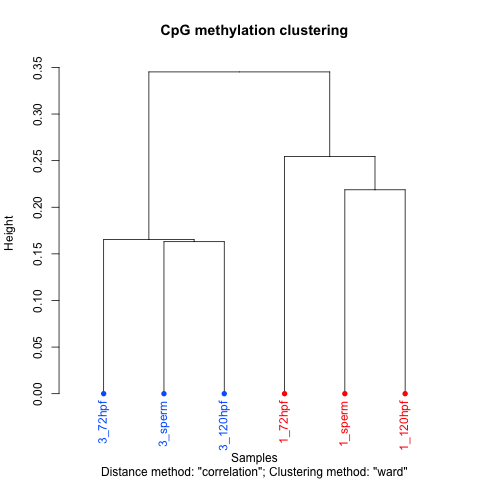

In [45]:
%%R
meth<-unite(myobj)
#getCorrelation(meth,plot=T)
hc<- clusterSamples(meth, dist="correlation", method="ward", plot=T)
#PCA<-PCASamples(meth)

# Differentially methylated loci

Determining differentially methylated loci using methylkit


In [63]:
%%R
#Family-specific DMLs
#note that file.list was defined in prior section
DMLobj=read(file.list,sample.id=list("M1","T1D3","T1D5","M3","T3D3","T3D5"),assembly="v9",treatment=c(1,1,1,0,0,0), context="CpG")
lin<-unite(DMLobj)
lin.pooled <- pool(lin, sample.ids <- c("lin_1", "lin_3"))
lin_DML.fisher <- calculateDiffMeth(lin.pooled)
select(lin_DML.fisher, 1)
lin_DML_p <- getData(lin_DML.fisher)
lin_DML_filt <- lin_DML_p[lin_DML_p$pvalue < 0.01 & lin_DML_p$meth.diff > 25,]
write.csv(lin_DML_filt,file="lin_DML_filt")

In [66]:
!wc -l lin_DML_filt

     190 lin_DML_filt


####Differentially methylated loci during development. 
This is done by doing three pairwise comparisons

In [68]:
%%R file.list <- list 
('mkfmt_M1.txt',
 'mkfmt_T1D3.txt',
 'mkfmt_M3.txt',
 'mkfmt_T3D3.txt'
)

In [69]:
%%R 
#Developmentally different DMLs (Males v Day3)
DMLobj=read(file.list,sample.id=list("M1","T1D3","M3","T3D3"), assembly="v9",treatment=c(1,0,1,0), context="CpG")
DevelMvD3<-unite(DMLobj)
DevelMvD3.pooled <- pool(DevelMvD3, sample.ids <- c("Males", "Day3"))
DevelMvD3_DML.fisher <- calculateDiffMeth(DevelMvD3.pooled)
select(DevelMvD3_DML.fisher, 1)
DevelMvD3_DML_p <- getData(DevelMvD3_DML.fisher)
DevelMvD3_DML_filt <- DevelMvD3_DML_p[DevelMvD3_DML_p$pvalue < 0.01 & DevelMvD3_DML_p$meth.diff > 25,]
write.csv(DevelMvD3_DML_filt,file="DevelMvD3_DML_filt")

In [70]:
!wc -l DevelMvD3_DML_filt

      30 DevelMvD3_DML_filt


In [114]:
%%R file.list <- list 
('mkfmt_M1.txt',
 'mkfmt_T1D5.txt',
 'mkfmt_M3.txt',
 'mkfmt_T3D5.txt'
)

In [115]:
%%R 
#Developmentally different DMLs (Males v Day5)
DMLobj=read(file.list,sample.id=list("M1","T1D5","M3","T3D5"), assembly="v9",treatment=c(1,0,1,0), context="CpG")
DevelMvD5<-unite(DMLobj)
DevelMvD5.pooled <- pool(DevelMvD5, sample.ids <- c("Males", "Day5"))
DevelMvD5_DML.fisher <- calculateDiffMeth(DevelMvD5.pooled)
select(DevelMvD5_DML.fisher, 1)
DevelMvD5_DML_p <- getData(DevelMvD5_DML.fisher)
DevelMvD5_DML_filt <- DevelMvD5_DML_p[DevelMvD5_DML_p$pvalue < 0.01 & DevelMvD5_DML_p$meth.diff > 25,]
write.csv(DevelMvD5_DML_filt,file="DevelMvD5_DML_filt")

In [117]:
!wc -l DevelMvD5_DML_filt

      86 DevelMvD5_DML_filt


In [74]:
%%R file.list <- list 
('mkfmt_T1D3.txt',
 'mkfmt_T1D5.txt',
 'mkfmt_T3D3.txt',
 'mkfmt_T3D5.txt'
)

In [75]:
%%R 
#Developmentally different DMLs (Day3 v Day5)
DMLobj=read(file.list,sample.id=list("T1D3","T1D5","T3D3","T3D5"), assembly="v9",treatment=c(1,0,1,0), context="CpG")
DevelD3vD5<-unite(DMLobj)
DevelD3vD5.pooled <- pool(DevelD3vD5, sample.ids <- c("Day3", "Day5"))
DevelD3vD5_DML.fisher <- calculateDiffMeth(DevelD3vD5.pooled)
select(DevelD3vD5_DML.fisher, 1)
DevelD3vD5_DML_p <- getData(DevelD3vD5_DML.fisher)
DevelD3vD5_DML_filt <- DevelD3vD5_DML_p[DevelD3vD5_DML_p$pvalue < 0.01 & DevelD3vD5_DML_p$meth.diff > 25,]
write.csv(DevelD3vD5_DML_filt,file="DevelD3vD5_DML_filt")

In [116]:
!wc -l DevelD3vD5_DML_filt

      47 DevelD3vD5_DML_filt


In [123]:
#removing column titles
!tail -n +2 DevelMvD5_DML_filt > DevelMvD5_DML
!tail -n +2 DevelD3vD5_DML_filt > DevelD3vD5_DML 

In [124]:
#Concatenate all developmetnally different DMLs to one file
!cat DevelMvD3_DML_filt DevelMvD5_DML DevelD3vD5_DML > Devel_DML_filt

In [125]:
!wc -l Devel_DML_filt

     161 Devel_DML_filt


###Creating DML BED files

In [173]:
!tail -n +2 lin_DML_filt | awk -F, '{print $2, $3, $4, "DML_lin" }' | tr -d '"' | tr ' ' "\t"  > lineage_dml.bed

In [175]:
!wc -l lineage_dml.bed

     189 lineage_dml.bed


In [233]:
!tail -n +2 Devel_DML_filt | awk -F, '{print $2, $3, $4, "DML_dev" }' | tr -d '"' | tr ' ' "\t"  > dev_dml.bed

In [235]:
!wc -l dev_dml.bed

     160 dev_dml.bed


# Genomic location of DMLs

In [ ]:
#In order to find location of DMLs oyster genome tracks will be downloaded
#and intersectbed (bedtools suite) run
#Note track with all CG's is large (~977mb)

In [4]:
cd genome_tracks


/Users/sr320/git-repos/olson-ms-nb/wd/genome_tracks


In [5]:
for i in ("exon","intron","TEx","gene","1k5p_gene_promoter","CG"):
    !curl -O http://eagle.fish.washington.edu/trilobite/Crassostrea_gigas_v9_tracks/Cgigas_v9_{i}.gff 



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.7M  100 11.7M    0     0  11.5M      0  0:00:01  0:00:01 --:--:-- 11.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.0M  100 12.0M    0     0  14.7M      0 --:--:-- --:--:-- --:--:-- 14.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3129k  100 3129k    0     0  16.3M      0 --:--:-- --:--:-- --:--:-- 16.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1777k  100 1777k    0     0  15.0M      0 --:--:-- --:--:-- --:--:-- 15.0M
  % Total    % Received % Xferd  Average Speed   Tim

In [6]:
cd ..

/Users/sr320/git-repos/olson-ms-nb/wd


In [44]:
for i in ("exon","intron","TEx","1k5p_gene_promoter"):
    !intersectbed \
    -u \
    -a lineage_dml.bed \
    -b ./genome_tracks/Cgigas_v9_{i}.gff \
    > {i}_intersect_DML_lin_u.txt
    !wc -l {i}_intersect_DML_lin_u.txt
    !wc -l {i}_intersect_DML_lin_u.txt > lin{i}

      25 exon_intersect_DML_lin_u.txt
      42 intron_intersect_DML_lin_u.txt
      24 TEx_intersect_DML_lin_u.txt
       8 1k5p_gene_promoter_intersect_DML_lin_u.txt


```
-u
Write original A entry once if any overlaps found in B. In other words, just report the fact at least one overlap was found in B. Restricted by -f and -r.
```

## List genes lineage DMLs overlap

In [49]:
for i in ("exon", "gene", "intron","TEx","1k5p_gene_promoter"):
    !intersectbed \
    -wb \
    -a lineage_dml.bed \
    -b ./genome_tracks/Cgigas_v9_{i}.gff \
    > {i}_intersect_DML_lin_wb.txt
    !wc -l {i}_intersect_DML_lin_wb.txt

      25 exon_intersect_DML_lin_wb.txt
      67 gene_intersect_DML_lin_wb.txt
      42 intron_intersect_DML_lin_wb.txt
      30 TEx_intersect_DML_lin_wb.txt
       9 1k5p_gene_promoter_intersect_DML_lin_wb.txt


In [51]:
!head gene_intersect_DML_lin_wb.txt

scaffold105	2443	2443	DML_lin	scaffold105	GLEAN	mRNA	328	2580	0.999547	-	.	ID=CGI_10015737;
scaffold1052	37566	37566	DML_lin	scaffold1052	GLEAN	mRNA	1917	38966	0.980203	-	.	ID=CGI_10005467;
scaffold1103	30261	30261	DML_lin	scaffold1103	GLEAN	mRNA	24786	37142	0.791674	-	.	ID=CGI_10004869;
scaffold126	406978	406978	DML_lin	scaffold126	GLEAN	mRNA	401847	409297	0.306208	+	.	ID=CGI_10019197;
scaffold1360	383393	383393	DML_lin	scaffold1360	GLEAN	mRNA	377011	383564	0.644549	+	.	ID=CGI_10022652;
scaffold1404	121205	121205	DML_lin	scaffold1404	GLEAN	mRNA	111746	123746	0.517387	-	.	ID=CGI_10008830;
scaffold142	1002225	1002225	DML_lin	scaffold142	GLEAN	mRNA	988947	1002463	0.992639	+	.	ID=CGI_10026783;
scaffold1478	5475	5475	DML_lin	scaffold1478	GLEAN	mRNA	130	11329	0.841413	+	.	ID=CGI_10000895;
scaffold1507	7227	7227	DML_lin	scaffold1507	GLEAN	mRNA	32	12359	0.675757	+	.	ID=CGI_10001767;
scaffold152	298664	298664	DML_lin	scaffold152	GLEAN	mRNA	296688	308228	1	-	.	ID=CGI_10014898;


### Code used in SQLShare to get gene names
```
SELECT * FROM [sr320@washington.edu].[exon_intersect_DML_lin_wb]ei
  left join
  [sr320@washington.edu].[qDOD Cgigas Gene Descriptions (Swiss-prot)]sp
  on
  ei.Column14 = sp.CGI_ID
```  
  
```
SELECT * FROM [sr320@washington.edu].[intron_intersect_DML_lin_wb]ii
  left join
  [sr320@washington.edu].[qDOD Cgigas Gene Descriptions (Swiss-prot)]sp
  on
  ii.Column14 = sp.CGI_ID
```  
  

In [53]:
#Concatenate counts of genomic regions into one table for lineage-specific DMLs
!cat linintron linexon lin1k5p_gene_promoter linTEx > lintable

In [54]:
!awk 'FNR==NR{sum+=$1;next}; {print $0,sum}' lintable{,} > lin_total

In [55]:
!awk '{print $2, $1, $3, (($1/$3)*100)}' lin_total > lineage_DMLs

In [56]:
!cat lineage_DMLs

intron_intersect_DML_lin_u.txt 42 99 42.4242
exon_intersect_DML_lin_u.txt 25 99 25.2525
1k5p_gene_promoter_intersect_DML_lin_u.txt 8 99 8.08081
TEx_intersect_DML_lin_u.txt 24 99 24.2424


---

In [12]:
for i in ("exon","intron","TEx","1k5p_gene_promoter"):
    !intersectbed \
    -u \
    -a dev_dml.bed \
    -b ./genome_tracks/Cgigas_v9_{i}.gff \
    > {i}_intersect_DML_dev_u.txt
    !wc -l {i}_intersect_DML_dev_u.txt > dev{i}

In [13]:
#Concatenate counts of genomic regions into one table for developmentally different DMLs
!cat devintron devexon dev1k5p_gene_promoter devTEx  > devtable

In [14]:
!awk 'FNR==NR{sum+=$1;next}; {print $0,sum}' devtable{,} > dev_total

In [15]:
!awk '{print $2, $1, $3, (($1/$3)*100)}' dev_total > developmental_DMLs

## List of genes Developmental DMLs overlap

In [52]:
for i in ("exon", "gene", "intron","TEx","1k5p_gene_promoter"):
    !intersectbed \
    -wb \
    -a dev_dml.bed \
    -b ./genome_tracks/Cgigas_v9_{i}.gff \
    > {i}_intersect_DML_dev_wb.txt
    !wc -l {i}_intersect_DML_dev_wb.txt

      13 exon_intersect_DML_dev_wb.txt
      75 gene_intersect_DML_dev_wb.txt
      62 intron_intersect_DML_dev_wb.txt
      17 TEx_intersect_DML_dev_wb.txt
       6 1k5p_gene_promoter_intersect_DML_dev_wb.txt


In [ ]:
for i in ("exon", "gene", "intron","TEx","1k5p_gene_promoter"):
    !intersectbed \
    -wb \
    -a lineage_dml.bed \
    -b ./genome_tracks/Cgigas_v9_{i}.gff \
    > {i}_intersect_DML_lin_wb.txt
    !wc -l {i}_intersect_DML_lin_wb.txt

In [17]:
#Concatenate counts of genomic regions into one table for all CGs in oyster genome
!cat CGintron CGexon CG1k5p_gene_promoter CGTEx > CGtable

In [18]:
!awk 'FNR==NR{sum+=$1;next}; {print $0,sum}' CGtable{,} > CG_total

In [19]:
!awk '{print $2, $1, $3, (($1/$3)*100)}' CG_total > all_CGs

In [20]:
!paste -d" " lineage_DMLs developmental_DMLs all_CGs > StackedBars

In [21]:
!awk '{print $4, $8, $12}' StackedBars | tr ' ' "\t" > StackedBars_DMLs

# Stacked Bar Plot of DMLs versus all CGs

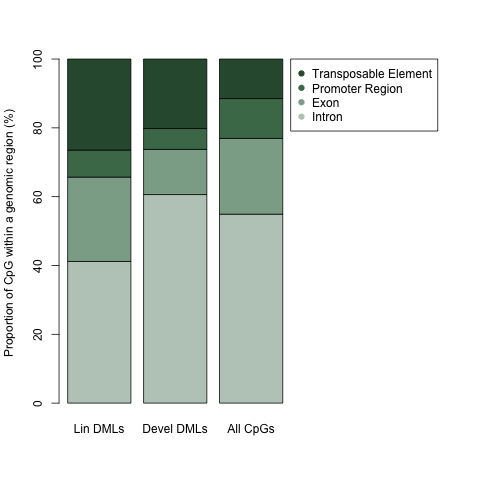

In [365]:
%%R 
DMLs<-as.matrix(read.table('StackedBars_DMLs', header=F))
colnames(DMLs)<-c("Lin DMLs","Devel DMLs", "All CpGs")
par(mar=c(5.1, 4.1, 4.1, 8.1), xpd=T)
par(xpd=T, mar=par()$mar+c(0,0,0,5))
barplot(as.matrix(DMLs), col=c("#BCCCC1", "#8DAB96", "#4A7958", "#2F583B"), ylab="Proportion of CpG within a genomic region (%)")
legend("topright",inset=c(-0.63,-0), legend=c("Transposable Element", "Promoter Region", "Exon", "Intron"), pch=c(19,19,19), col=c("#2F583B","#4A7958","#8DAB96","#BCCCC1"))

# Statistical Analysis (Chi-squared test)

In [ ]:
#Formatting family-specific DML files for stats
!wc -l lineage_dml.bed > lineage_countstotal

In [ ]:
!wc -l ./genome_tracks/Cgigas_v9_CG.gff > CG_countstotal

In [ ]:
!cat linTEx lineage_countstotal > Lineage_TEs

In [ ]:
!awk '{print $1}' Lineage_TEs > Lineage_TEs_counts

In [ ]:
!cat CGTEx CG_countstotal > CG_TEs

In [ ]:
!awk '{print $1}' CG_TEs > CG_TEs_counts

In [ ]:
!paste Lineage_TEs_counts CG_TEs_counts > LinTEs_combined

In [ ]:
!awk '{print $1, $2}' LinTEs_combined > Lineage_TEs_stats

In [ ]:
%%R
#Stats for TEs: family-specific
LinStats<- read.table('Lineage_TEs_stats')
chisq.test(LinStats)

In [ ]:
#formatting developmental DML files for stats
!wc -l dev_dml.bed > dev_countstotal

In [ ]:
!cat devTEx dev_countstotal > Dev_TEs

In [ ]:
!awk '{print $1}' Dev_TEs > Dev_TEs_counts

In [ ]:
!paste Dev_TEs_counts CG_TEs_counts > DevTEs_combined

In [ ]:
!awk '{print $1, $2}' DevTEs_combined > Dev_TEs_stats

In [ ]:
%%R
#Stats for TEs: developmentally different
DevStats<-read.table('Dev_TEs_stats')
chisq.test(DevStats)